## IRIS INFORMATION

   İris, gösterişli çiçekleri olan 260–300 tür çiçekli bitki cinsidir. Adını, Yunan gökkuşağının tanrıçası Iris'in de adı olan gökkuşağı anlamına gelen Yunanca kelimesinden alıyor. 
   Veri Bilimi amacımız için aşağıdaki 3 farklı Iris türü için EDA yapacağız:
* Setosa
* Versicolor
* Virginica


   Çiçeklerin özellikleri:

* sepal lenght 
* sepal width 
* petal length 
* petal width 


![](http://miro.medium.com/max/3500/1*f6KbPXwksAliMIsibFyGJw.png)
![](https://content.codecademy.com/programs/machine-learning/k-means/iris.svg)

**Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

**Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))**

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

**+Veri çerçevesini yazdıralım.**

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Veri çerçevesinin ilk beş değerini gösterelim.**




In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**+Veri çerçevesinin beliri bir kısmını görelim.**

In [5]:
df.iloc[0:3 , 0:2] 

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


**+Liste aracılığı ile öznitelikleri seçerek gösterelim**

In [6]:
liste = ["sepal_length","sepal_width"]
df.head(3)[liste]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


**+Listenin içinde ki özniteliklerin df içinde olup olmadığını sorgulayalım.**

In [7]:
for i in liste:
    print(i in df)

True
True


***Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.***

In [8]:
df.axes #150 gözlemden oluşur

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')]

In [9]:
df.columns.size #5 öznitelikten oluşur.

5

In [10]:
df.shape #Gözlem ve öznitelik sayılarını gösteren kodumuz

(150, 5)

**+Veri çerçevesinin boyutunu görüntüleyelim.**

In [11]:
df.ndim

2

***Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.***

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.**

**Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5




**+Herhangi bir özniteliğin istatistik değerlerini tek basına görmek istersek...**

In [14]:
df["sepal_length"].mean()

#.std()---.median()
#.std()**2

5.843333333333335

**Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.**

In [15]:
df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.**

**En güçlü pozitif ilişki hangi iki değişken arasındadır?**

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.**

<AxesSubplot:>

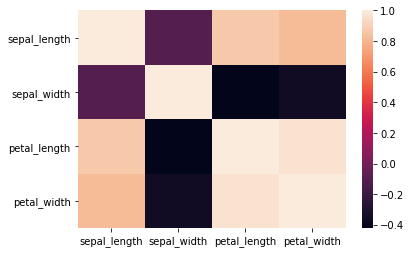

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)

**Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.**

In [18]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.**

In [19]:
df["species"].unique().size #nunique de olur.

3

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

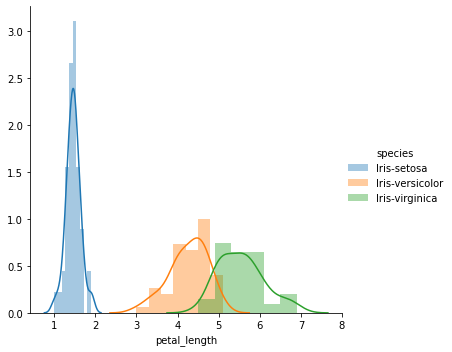

In [20]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();


**+Vercicolor ve virginica çiçek türlerinin taç yaprak uzunluğu için değerlerinin bibirine çok yakın olduğunu, setosa'nın diğer iki çiçekten ayrıldığını görüyoruz.**

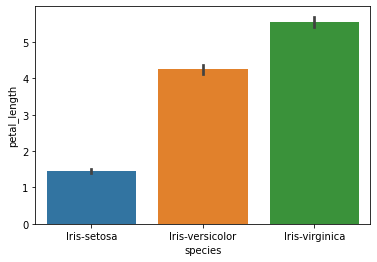

In [21]:
sns.barplot(x ="species" , y = "petal_length" , data = df);

**+Çiçek türlerinin taç yaprak uzunluğuna farklı bir bakış açısı olarak arasındaki farka net bir şekilde bakıyoruz.**

**Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.**

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

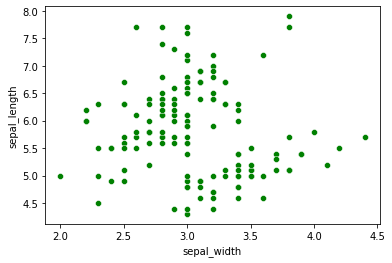

In [22]:
sns.scatterplot(x="sepal_width" , y="sepal_length", data  = df , color="green")

**Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim.**

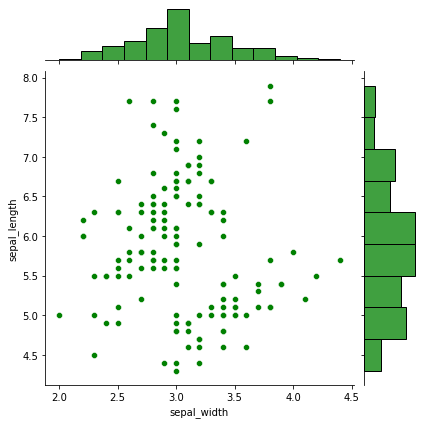

In [23]:
sns.jointplot(x="sepal_width" , y="sepal_length", data  = df , color="green")

**Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım.** 

**3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.**

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

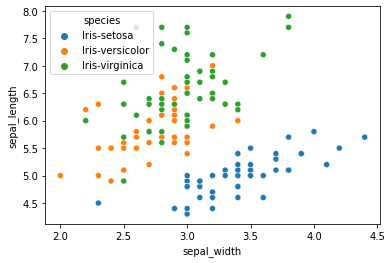

In [24]:
sns.scatterplot(x="sepal_width" , y="sepal_length",hue="species" , data  = df )

**value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım.**

In [25]:
df["species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

**Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?**

**50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini verelim.**

<AxesSubplot:xlabel='species', ylabel='count'>

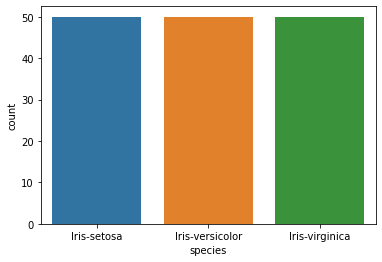

In [26]:
sns.countplot(x="species", data=df)

**Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin.**

**Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?**

<AxesSubplot:ylabel='sepal_width'>

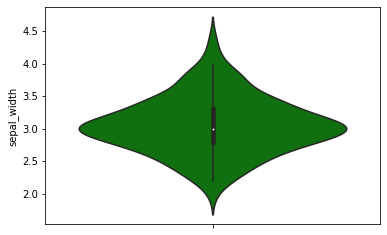

In [27]:
sns.violinplot(y="sepal_width", data  = df , color="green")

**Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.**

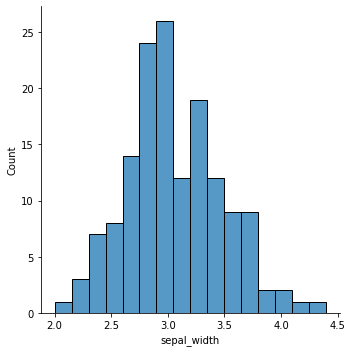

In [28]:
sns.displot(df["sepal_width"], bins=16)

**Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.**

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

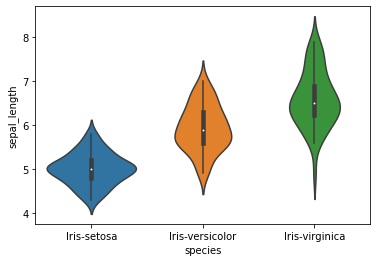

In [29]:
sns.violinplot(x="species" , y="sepal_length", data  = df )

**sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.**

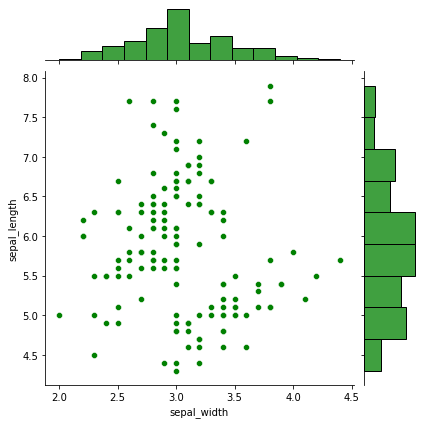

In [30]:
sns.jointplot(x="sepal_width" , y="sepal_length", data  = df , color="green")


**Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.**

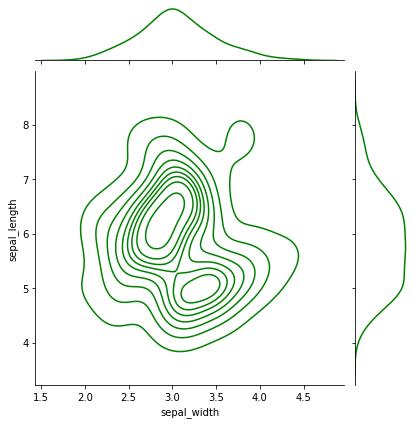

In [31]:
sns.jointplot(x="sepal_width" , y="sepal_length", kind = "kde" , data  = df , color="green")

**scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.**

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

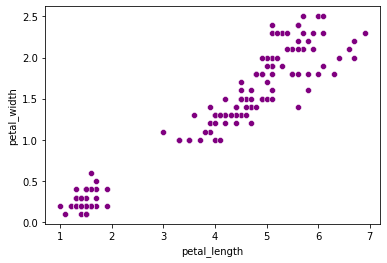

In [32]:
sns.scatterplot(x="petal_length" , y="petal_width",  data  = df , color="purple")

**Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.**

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

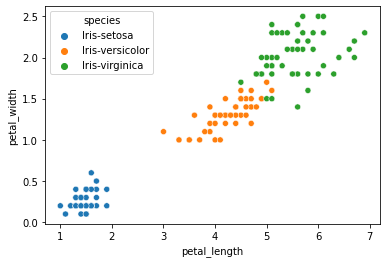

In [33]:
sns.scatterplot(x="petal_length" , y="petal_width",  data  = df , hue="species")

**sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim.**

**Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.**

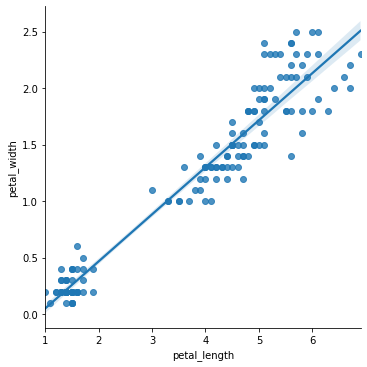

In [34]:
sns.lmplot(x="petal_length" , y="petal_width", data=df)

**Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım.**

In [35]:
df[["petal_length", "petal_width"]].corr()

,petal_length,petal_width
petal_length,1.000000,0.962757
petal_width,0.962757,1.000000


**Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.**

In [36]:
df["total_length"] = df["petal_length"] + df["sepal_length"]

**total.length'in ortalama değerini yazdıralım.**

In [37]:
df["total_length"].mean()

9.602000000000004

**total.length'in standart sapma değerini yazdıralım.**

In [38]:
df["total_length"].std()

2.5191739884121978

**sepal.length'in maksimum değerini yazdıralım.**

In [39]:
df["sepal_length"].max()

7.9

**sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.**

In [40]:
df[(df["sepal_length"] > 5.5) & (df["species"]== "Iris-setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
14,5.8,4.0,1.2,0.2,Iris-setosa,7.0
15,5.7,4.4,1.5,0.4,Iris-setosa,7.2
18,5.7,3.8,1.7,0.3,Iris-setosa,7.4


**petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.**

In [41]:
df[(df["sepal_length"] < 5) & (df["species"]== "Iris-virginica")][["sepal_length" , "sepal_width"]]

,sepal_length,sepal_width
106,4.9,2.5


**Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.**

In [42]:
df.groupby("species").apply(lambda x: np.mean(x))

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


**Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım.**

In [43]:
df.groupby("species")["petal_length"].apply(lambda x: np.std(x))

species
Iris-setosa        0.171767
Iris-versicolor    0.465188
Iris-virginica     0.546348
Name: petal_length, dtype: float64